# Projet A : Predict product price 

**Alizée BA - MSC Data Management**

Installation des librairies :

In [187]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
rcParams['figure.figsize'] = (15.0, 8.0)

Chargement des données

In [38]:
Data = pd.read_csv('./data.csv', sep =",")
Data.head()

,id_product,month,day,universe,category,subcategory,brand,model,colour,material,condition,popularity_1,popularity_2,price
0,52135,6.0,27.0,universe_2,category_2,subcategory_5,brand_82,NaN,colour_3,material_23,condition_3,6.0,7.0,118.54
1,28934,5.0,19.0,universe_2,category_5,subcategory_10,brand_30,NaN,colour_3,material_23,condition_2,2.0,3.0,49.30
2,73306,11.0,26.0,universe_2,category_2,subcategory_9,brand_82,NaN,colour_6,material_23,condition_3,1.0,3.0,147.39
3,117368,6.0,2.0,universe_2,category_2,subcategory_9,brand_37,model_27,colour_8,material_23,condition_1,7.0,6.0,89.69
4,15080,1.0,12.0,universe_2,category_5,subcategory_1,brand_9,NaN,colour_2,material_51,condition_3,4.0,4.0,45.26


Présentation des données :

In [8]:
data.describe()

,month,day,popularity_1,popularity_2,price
count,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.68904,15.514867,5.394900,5.255493,87.700216
std,3.58986,8.949256,5.450525,6.505558,80.446368
min,1.00000,1.000000,0.000000,0.000000,3.300000
25%,3.00000,8.000000,2.000000,2.000000,40.650000
50%,7.00000,15.000000,4.000000,4.000000,63.730000
75%,10.00000,23.000000,7.000000,7.000000,107.000000
max,12.00000,31.000000,112.000000,335.000000,5314.500000


In [109]:
data.dtypes

id_product        int64
month           float64
day             float64
universe         object
category         object
subcategory      object
brand            object
model            object
colour           object
material         object
condition        object
popularity_1    float64
popularity_2    float64
price           float64
dtype: object

In [4]:
data.shape

(150000, 14)

Valeurs manquantes :

In [78]:
def missing_zero_values_table(data):

        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Total Data'] = len(data)
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mz_table

missing_zero_values_table(data)

,Missing Values,% of Total Values,Total Data
model,141450,94.3,150000


Nettoyage des données

In [99]:
data=Data.drop(columns=["model"],axis=1)

In [100]:
data.head()

,id_product,month,day,universe,category,subcategory,brand,colour,material,condition,popularity_1,popularity_2,price
0,52135,6.0,27.0,universe_2,category_2,subcategory_5,brand_82,colour_3,material_23,condition_3,6.0,7.0,118.54
1,28934,5.0,19.0,universe_2,category_5,subcategory_10,brand_30,colour_3,material_23,condition_2,2.0,3.0,49.30
2,73306,11.0,26.0,universe_2,category_2,subcategory_9,brand_82,colour_6,material_23,condition_3,1.0,3.0,147.39
3,117368,6.0,2.0,universe_2,category_2,subcategory_9,brand_37,colour_8,material_23,condition_1,7.0,6.0,89.69
4,15080,1.0,12.0,universe_2,category_5,subcategory_1,brand_9,colour_2,material_51,condition_3,4.0,4.0,45.26


In [5]:
data.shape

(150000, 12)

In [9]:
categ_col = ['universe', 'category', 'subcategory', 'brand', 'colour','material','condition'] 
num_col = ['month', 'day', 'popularity_1', 'popularity_2', 'price'] 

# DATA EXPLORATION 

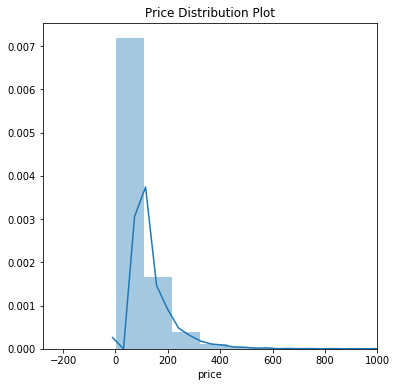

In [66]:
plt.figure(figsize=(6,6))
plt.title('Price Distribution Plot')
fig=sns.distplot(data['price'])
fig.axis(xmax=1000);

Text(0, 0.5, 'Frequency')

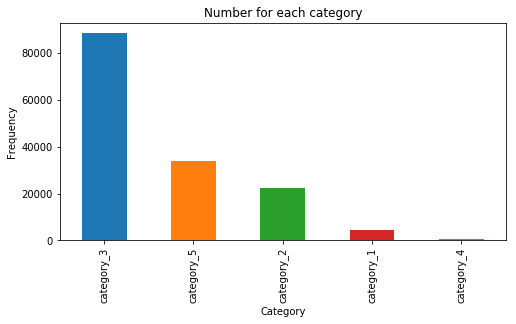

In [8]:
ax = data['category'].value_counts().plot(kind='bar',
                                    figsize=(8,4),
                                    title="Number for each category")
ax.set_xlabel("Category")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

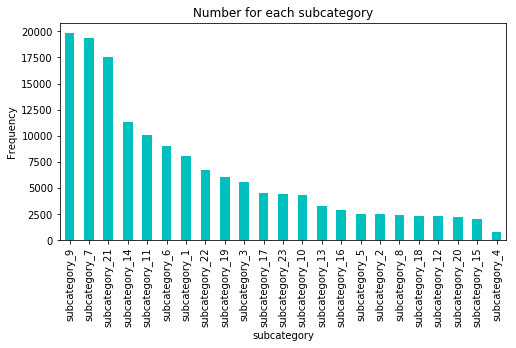

In [21]:
ax = data['subcategory'].value_counts().plot(kind='bar',
                                    figsize=(8,4),
                                    title="Number for each subcategory",color='c')
ax.set_xlabel("subcategory")
ax.set_ylabel("Frequency")

[Text(0, 0.5, 'PRICE'), Text(0.5, 0, 'BRAND')]

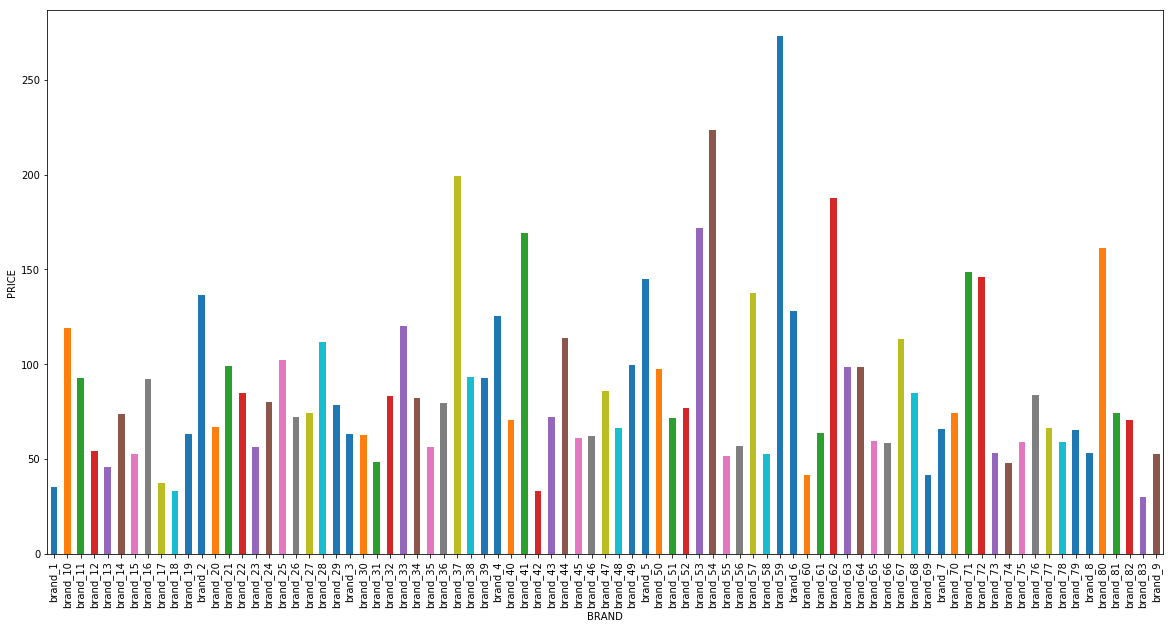

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
result = data.groupby('brand').price.mean().plot(kind='bar')
ax.set(xlabel='BRAND', ylabel='PRICE')

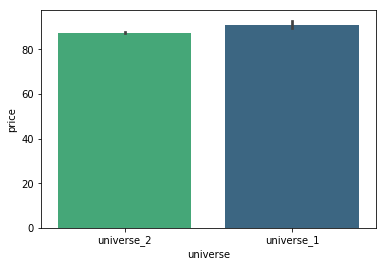

In [83]:
fig = sns.barplot(x="universe", y="price",palette="viridis_r", data=data)

[Text(0, 0.5, 'PRICE'), Text(0.5, 0, 'subcategory')]

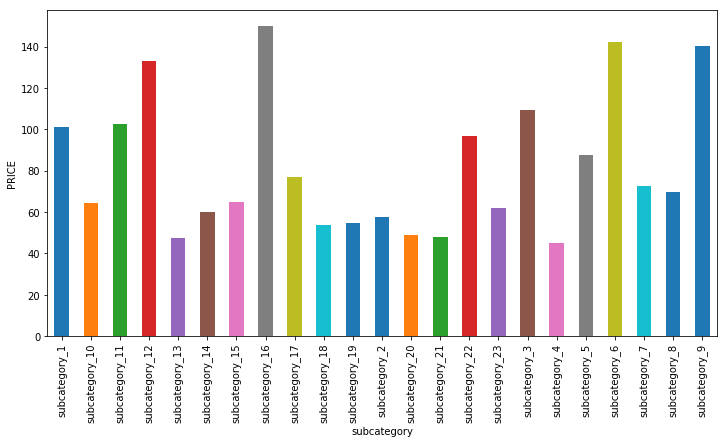

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
result = data.groupby('subcategory').price.mean().plot(kind='bar')
ax.set(xlabel='subcategory', ylabel='PRICE')

Corrélation des variables :

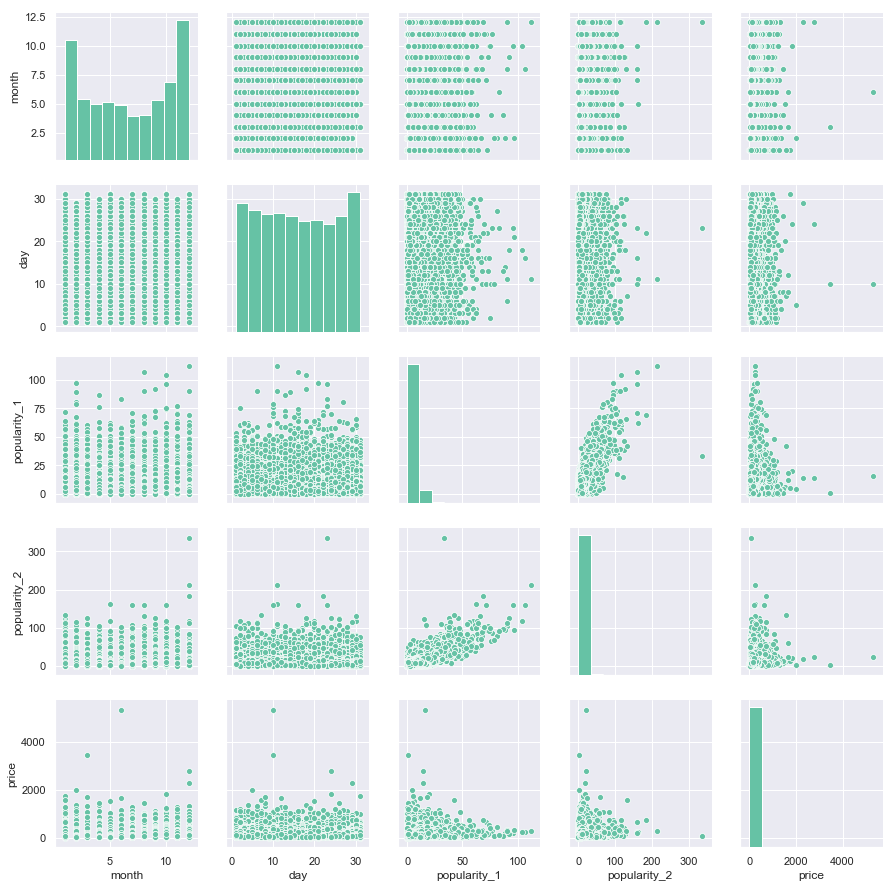

In [54]:
sns.set(palette="Set2")
sns.pairplot(data);

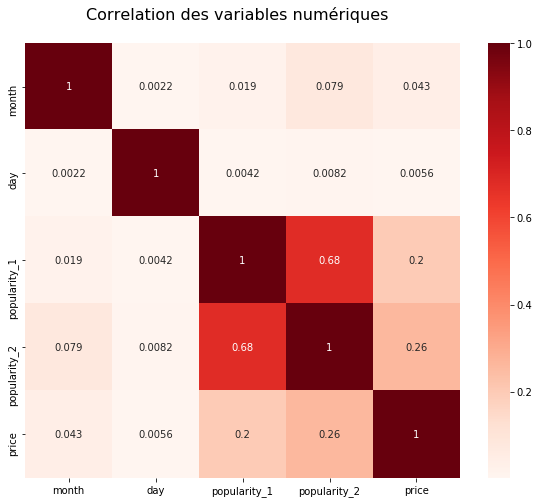

In [46]:
f , ax = plt.subplots(figsize = (10,8)) #dimensions du graphique
plt.title('Correlation des variables numériques  \n',y=1,size=16) #titre
sns.heatmap(data.corr(method='spearman'),annot=True,square=True,cmap='Reds');

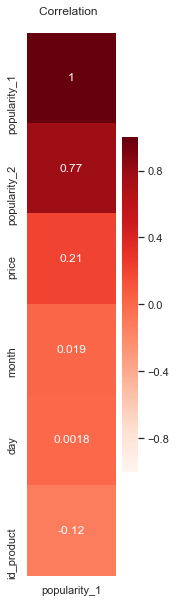

In [13]:
plt.figure(figsize=(2,10))
sns.heatmap(data.corr()[['popularity_1']].sort_values(by='popularity_1', ascending=False),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap='Reds')
plt.title('Correlation  \n');

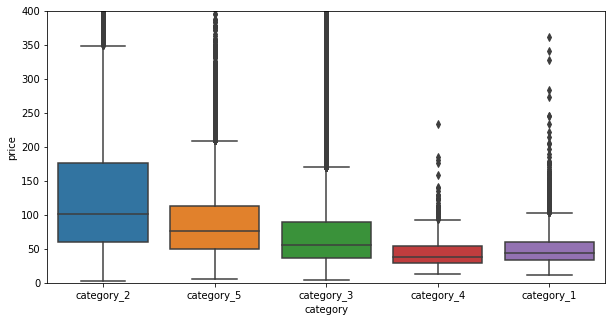

In [72]:
var = 'category'
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=400);

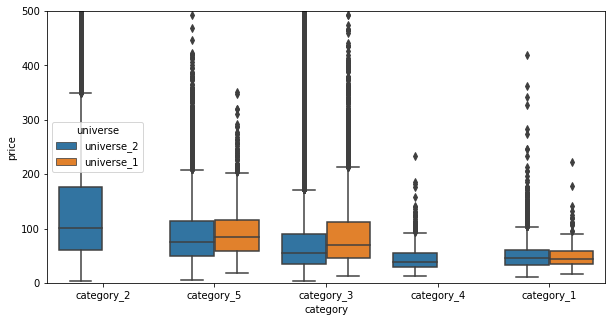

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
fig=sns.boxplot(x = 'category', y = 'price', hue = 'universe', data = data)
fig.axis(ymin=0, ymax=500);
plt.show()

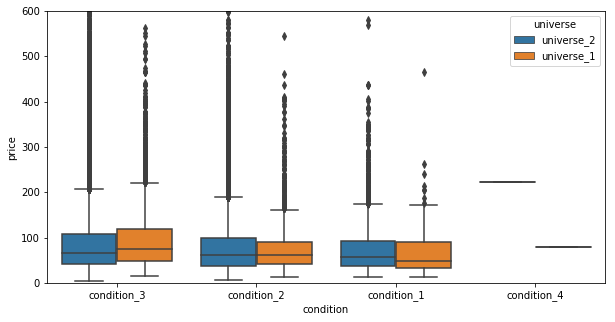

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
fig=sns.boxplot(x = 'condition', y = 'price', hue = 'universe', data = data)
fig.axis(ymin=0, ymax=600);
plt.show()

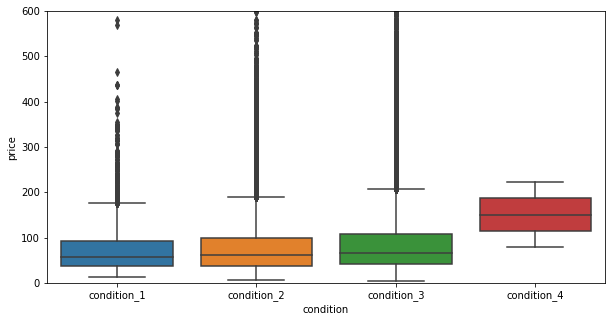

In [67]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='condition', y="price", data=data,order=["condition_1", "condition_2","condition_3","condition_4"])
fig.axis(ymin=0,ymax=600);

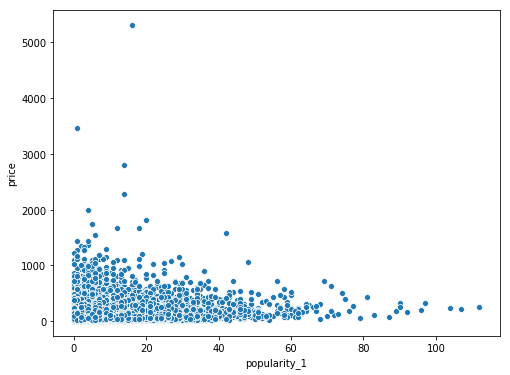

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='popularity_1', y="price", data=data)

Valeurs aberrantes

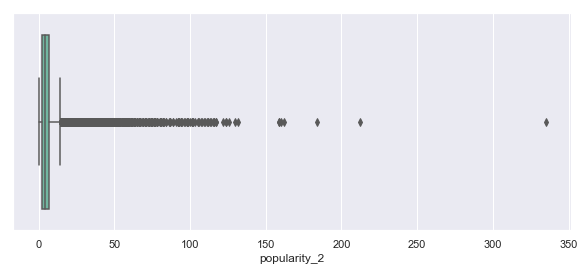

In [64]:
f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x=data["popularity_2"])
#plt.xlim([-1,30])

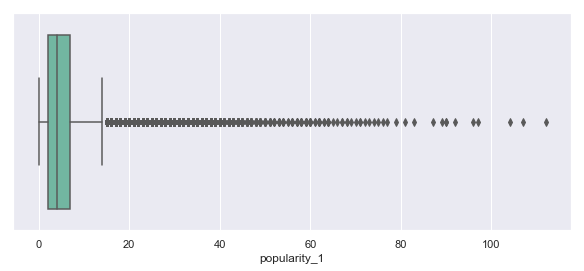

In [65]:
f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x=data["popularity_1"])
#plt.xlim([-1,30])

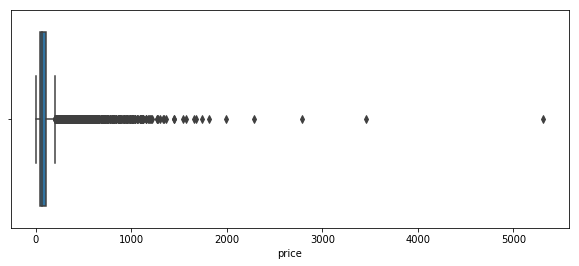

In [42]:
f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x=data["price"])
#plt.xlim([0,400])

In [40]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

L’objectif sera de prédire le prix des articles grâce aux différentes informations présentes dans le jeu de données .

### DATA ENGENEERING

In [101]:
#suppression des outliers
data=data.drop(data[data.price>250].index & data[data.popularity_1>20].index & data[data.popularity_2>20].index)
print(data.shape)

(149636, 13)


##### Extraction des features et labels

In [158]:
test.shape,data.shape

((24584, 12), (149636, 13))

In [155]:
#on utilise 5 variables explicatives
#X = data.drop(columns='price') 
X =data[['condition','brand','subcategory','category','material']]

#conversion des variables catégorielles :
X = pd.get_dummies(X) 
X["id_product"]=data["id_product"]
# variable à prédire :
Y = data['price']

In [156]:
X.shape

(149636, 176)

###  Training and Testing Sets

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=10)

#taille des echantillons
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119708, 176)
(29928, 176)
(119708,)
(29928,)


In [116]:
feature=X.drop(columns="id_product").columns.tolist()

## REGRESSION LINEAIRE

In [182]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [224]:
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
print(coeff)

                        Coefficient
condition_condition_1 -1.153991e+12
condition_condition_2 -1.153991e+12
condition_condition_3 -1.153991e+12
condition_condition_4 -1.153991e+12
brand_brand_1          1.010739e+13
brand_brand_10         1.010739e+13
brand_brand_11         1.010739e+13
brand_brand_12         1.010739e+13
brand_brand_13         1.010739e+13
brand_brand_14         1.010739e+13
brand_brand_15         1.010739e+13
brand_brand_16         1.010739e+13
brand_brand_17         1.010739e+13
brand_brand_18         1.010739e+13
brand_brand_19         1.010739e+13
brand_brand_2          1.010739e+13
brand_brand_20         1.010739e+13
brand_brand_21         1.010739e+13
brand_brand_22         1.010739e+13
brand_brand_23         1.010739e+13
brand_brand_24         1.010739e+13
brand_brand_25         1.010739e+13
brand_brand_26         1.010739e+13
brand_brand_27         1.010739e+13
brand_brand_28         1.010739e+13
brand_brand_29         1.010739e+13
brand_brand_3          1.010

In [ ]:
from sklearn.metrics import r2_score

In [223]:
# Evaluation du training set
import sklearn.metrics as metrics

y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = metrics.mean_absolute_error(Y_train,y_train_predict)

print('Performance du modèle sur la base d apprentissage :')
print('--------------------------------------')
print('Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('\n')
 
# Evaluation du testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = metrics.mean_absolute_error(Y_test,y_test_predict)
print('Performance du modèle sur la base de test :')
print('--------------------------------------')
print('Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('--------------------------------------')


Performance du modèle sur la base d apprentissage :
--------------------------------------
Erreur quadratique moyenne : 59.15417293808674
Score R2 : 0.4416889353628738
MAE :  34.40261711832125


Performance du modèle sur la base de test :
--------------------------------------
Erreur quadratique moyenne : 88724038309.82486
Score R2 : -1.3322126818921505e+18
MAE :  512864315.1765293
--------------------------------------


(0, 1700)

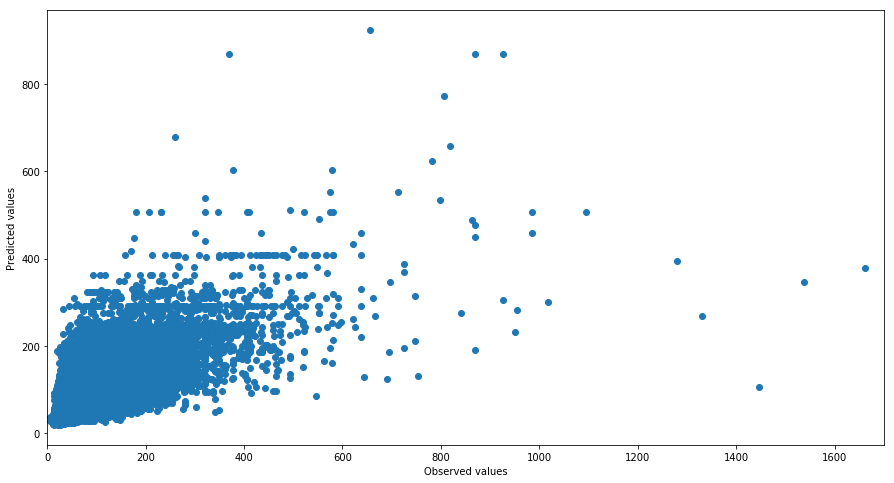

In [222]:
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.xlim([0,1700])

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


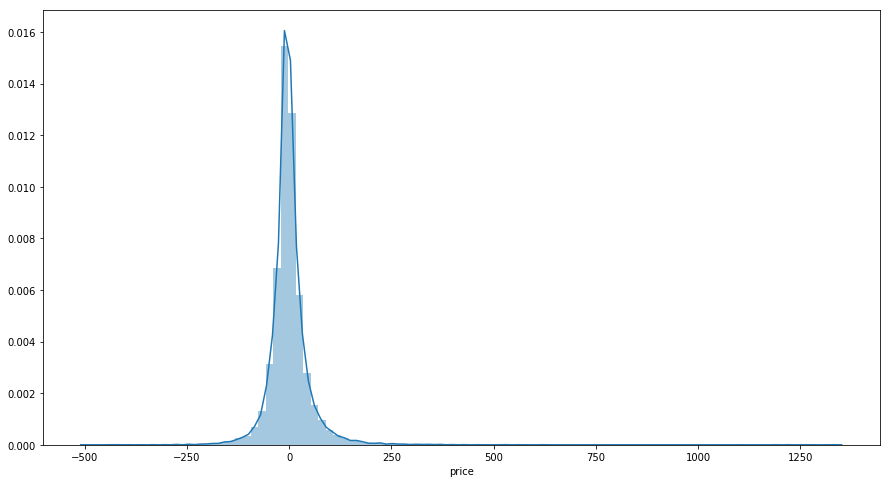

In [220]:
plt.clf()
sns.distplot((Y_test-y_test_predict),bins=100)
#plt.xlim(0, 10)

In [ ]:
from sklearn import metrics

In [221]:

print("MAE:", metrics.mean_absolute_error(Y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(Y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))

MAE: 29.642166627958126
MSE: 2603.516716138593
RMSE: 51.02466772198123


### STATMODELS

In [103]:
import statsmodels.api as sm
X1Train = sm.add_constant(X_train)
#print(X1Train.head())

In [225]:
reg = sm.OLS(Y_train,X1Train)
resReg = reg.fit()
#affichage
print(resReg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     573.5
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:58:57   Log-Likelihood:            -6.5827e+05
No. Observations:              119708   AIC:                         1.317e+06
Df Residuals:                  119542   BIC:                         1.318e+06
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Le R² = 0.44 (coefficient de détermination) : le modèle explique près de 45% de la
variabilité de la variable cible. Il n'y a pas de variable explicatives significatives à 5% (p-value < 0.05) dans le
modèle 

In [61]:
X1Test = sm.add_constant(X_test)
#appliquer le modèle
ypReg = reg.predict(resReg.params,X1Test)
print(ypReg)

[ 78.65214634 150.94403777 107.22823044 ... 102.89555882 200.46953132
 109.85294859]


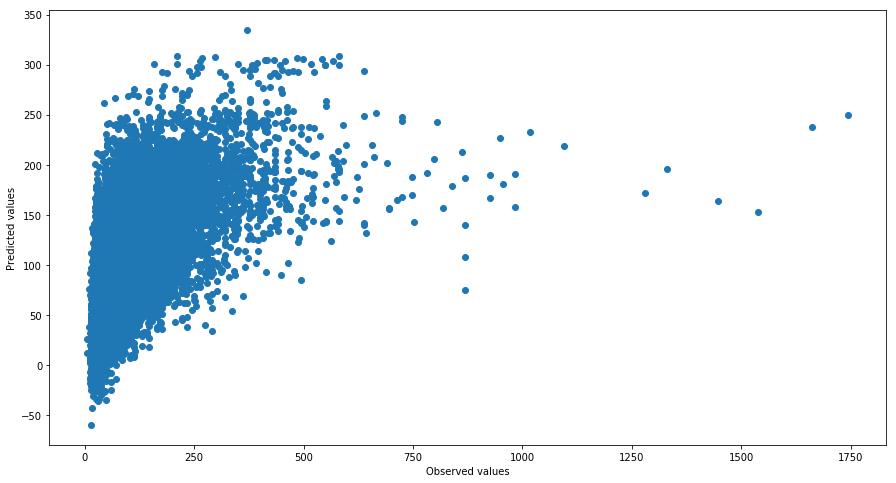

In [62]:
plt.scatter(Y_test,ypReg)
#plt.plot(np.arange(9,90,0.5),np.arange(9,90,0.5))
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()

### RIDGE 

In [192]:
# Ridge regression
ridge = Ridge(alpha=1)


In [69]:
nom_var = X.columns
coeff=pd.DataFrame({'Variables':nom_var,'Coefficients':ridge.coef_})
coeff.sort_values(by=['Coefficients'],ascending=False)

,Variables,Coefficients
59,brand_brand_59,151.517292
54,brand_brand_54,99.335718
63,brand_brand_62,97.234670
83,brand_brand_80,89.364692
35,brand_brand_37,69.838242
49,brand_brand_5,65.409296
95,subcategory_subcategory_16,64.935937
107,subcategory_subcategory_6,61.439195
57,brand_brand_57,54.473306
74,brand_brand_72,51.993850


## RANDOM FOREST 

In [114]:
feature

,condition_condition_1,condition_condition_2,condition_condition_3,condition_condition_4,brand_brand_1,brand_brand_10,brand_brand_11,brand_brand_12,brand_brand_13,brand_brand_14,...,material_material_55,material_material_56,material_material_57,material_material_58,material_material_59,material_material_6,material_material_60,material_material_7,material_material_8,material_material_9
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [120]:
from sklearn.ensemble import RandomForestRegressor

# Modèle d'instanciation avec 200 arbres de décision :
rf = RandomForestRegressor(n_estimators = 200, max_depth=9000, max_features =20, random_state = 360, n_jobs=-1)

# Former le modèle sur les données d'entraînement 
rf.fit (X_train[feature], Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9000,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=360,
           verbose=0, warm_start=False)

In [121]:
y_train_predict = rf.predict(X_train[feature])
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = metrics.mean_absolute_error(Y_train,y_train_predict)

print('Performance du modèle sur la base d apprentissage :')
print('--------------------------------------')
print('RMSE = Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('\n')
 
# model evaluation for testing set
y_test_predict = rf.predict(X_test[feature])
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = metrics.mean_absolute_error(Y_test,y_test_predict)
print('Performance du modèle sur la base de test :')
print('--------------------------------------')
print('RMSE = Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('--------------------------------------')

Performance du modèle sur la base d apprentissage :
--------------------------------------
RMSE = Erreur quadratique moyenne : 48.490518401197434
Score R2 : 0.6248377639868006
MAE :  26.718526310822412


Performance du modèle sur la base de test :
--------------------------------------
RMSE = Erreur quadratique moyenne : 51.02466772198123
Score R2 : 0.5593930607819304
MAE :  29.642166627958126
--------------------------------------


### Choix des hyperparamètres :

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 800, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, Y);

In [ ]:
rf_random.best_params_

## DECISION TREE 

In [193]:
from sklearn.tree import DecisionTreeRegressor
# building a base model
base_model = DecisionTreeRegressor()
base_model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [196]:
# R² = part de variance  expliquée par le modèle de régression, il détermine la proportion de variance dans la 
#variable dépendante qui peut être expliquée par la variable indépendante
# building final model
model = DecisionTreeRegressor(max_depth=50)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = metrics.mean_absolute_error(Y_train,y_train_predict)

print('Performance du modèle sur la base d apprentissage :')
print('--------------------------------------')
print('RMSE = Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('\n')
 
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = metrics.mean_absolute_error(Y_test,y_test_predict)
print('Performance du modèle sur la base de test :')
print('--------------------------------------')
print('RMSE = Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('--------------------------------------')

Performance du modèle sur la base d apprentissage :
--------------------------------------
RMSE = Erreur quadratique moyenne : 48.46980176995192
Score R2 : 0.6251582570529962
MAE :  26.817120932919835


Performance du modèle sur la base de test :
--------------------------------------
RMSE = Erreur quadratique moyenne : 51.61352573897869
Score R2 : 0.5491645936547385
MAE :  30.071875423144764
--------------------------------------


## LIGHTGBM

In [174]:
!pip install lightgbm
import lightgbm as lgb
d_train = lgb.Dataset(X_train, Y_train)

In [197]:
model = lgb.LGBMRegressor()
model.fit(X_train, Y_train)
print(); 
print(model)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [198]:
# make predictions
expected_y  = Y_test
predicted_y = model.predict(X_test)

In [199]:
# summarize the fit of the model
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = metrics.mean_absolute_error(Y_train,y_train_predict)

print('Performance du modèle sur la base d apprentissage :')
print('--------------------------------------')
print('Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('\n')
 
# Evaluation du testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(expected_y, predicted_y)))
r2 = r2_score(expected_y, predicted_y)
mae = metrics.mean_absolute_error(expected_y,predicted_y)
print('Performance du modèle sur la base de test :')
print('--------------------------------------')
print('Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('--------------------------------------')


Performance du modèle sur la base d apprentissage :
--------------------------------------
Erreur quadratique moyenne : 59.15417293808674
Score R2 : 0.4416889353628738
MAE :  34.40261711832125


Performance du modèle sur la base de test :
--------------------------------------
Erreur quadratique moyenne : 51.69298854137966
Score R2 : 0.5477753368028386
MAE :  30.34753206640999
--------------------------------------


C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


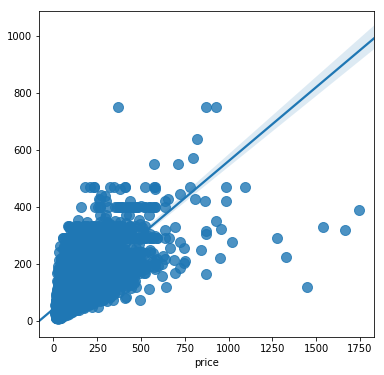

In [99]:
plt.figure(figsize=(6,6))         
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### data augmentation

In [81]:
X_Train, X_test, y_Train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=10)

In [75]:
#Data Augmentation 
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [76]:
from sklearn.model_selection import StratifiedKFold,KFold
num_folds = 11
train = X_Train
target = y_Train
features = [c for c in X_Train.columns if c not in ['id_product', 'price']]

folds = KFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(target))
feature_importance_df = pd.DataFrame()

 
print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_Train.values, y_Train.values)):
    
    X_train, y_train = X_Train.iloc[trn_idx][features], y_Train.iloc[trn_idx]
    X_valid, y_valid = X_Train.iloc[val_idx][features], y_Train.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
                                                                                 #5000
    clf = lgb.train(param, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(X_Train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(X_Train.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 4000 rounds
[5000]	training's rmse: 56.1596	valid_1's rmse: 80.712
[10000]	training's rmse: 54.1974	valid_1's rmse: 76.924
[15000]	training's rmse: 52.7924	valid_1's rmse: 74.6298
[20000]	training's rmse: 51.6747	valid_1's rmse: 72.7947
[25000]	training's rmse: 50.774	valid_1's rmse: 71.2394
[30000]	training's rmse: 49.976	valid_1's rmse: 69.8379
[35000]	training's rmse: 49.4109	valid_1's rmse: 68.7858
[40000]	training's rmse: 48.8888	valid_1's rmse: 67.7572
[45000]	training's rmse: 48.4873	valid_1's rmse: 66.9099
[50000]	training's rmse: 48.1877	valid_1's rmse: 66.2526
[55000]	training's rmse: 47.9216	valid_1's rmse: 65.6526
[60000]	training's rmse: 47.6935	valid_1's rmse: 65.1007
[65000]	training's rmse: 47.5069	valid_1's rmse: 64.6202
[70000]	training's rmse: 47.3456	valid_1's rmse: 64.209
[75000]	training's rmse: 47.1978	valid_1's rmse: 63.8201
[80000]	training's rmse: 47.0836	valid_1's rmse: 63.4984
[850

KeyboardInterrupt: 

### XGBOOST

In [152]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

In [200]:
#convertir lensemble de données en une structure de données optimisée appelée Dmatrix que XGBoost prend en 
#charge et lui donne des performances et des gains d efficacité reconnus
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [201]:
MODEL = XGBRegressor(n_estimators=100,
                    learning_rate = .1,
                    max_depth = 6,
                    random_state=42,
                    n_jobs = -1,
                    early_stopping_rounds=10)


#(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

reg = MODEL.fit(X_train,Y_train,eval_metric="rmse")
pred = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, pred)))
r2 = r2_score(Y_train, pred)
mae = metrics.mean_absolute_error(Y_train,pred)

print('Performance du modèle sur la base d apprentissage :')
print('......................................')
print ("Score Train -->", round(MODEL.score(X_train,Y_train) *100,2), " %")
print('RMSE = Erreur quadratique moyenne : {}'.format(rmse))
print('Score R2 : {}'.format(r2))
print('MAE : ',mae)
print('\n')
 
# model evaluation for testing set
pred_test = reg.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, pred_test)))
R2 = r2_score(Y_test, pred_test)
mae2 = metrics.mean_absolute_error(Y_test,pred_test)
print('Performance du modèle sur la base de test :')
print('......................................')
print ("Score Test -->", round(MODEL.score(X_test,Y_test) *100,2), " %")
print('RMSE = Erreur quadratique moyenne : {}'.format(rmse2))
print('Score R2 : {}'.format(R2))
print('MAE : ',mae2)




[00:27:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Performance du modèle sur la base d apprentissage :
......................................
Score Train --> 52.99  %
RMSE = Erreur quadratique moyenne : 54.281195865705506
Score R2 : 0.5298848192150329
MAE :  31.783708083110415


Performance du modèle sur la base de test :
......................................
Score Test --> 51.42  %
RMSE = Erreur quadratique moyenne : 53.57719596564558
Score R2 : 0.5142073684525887
MAE :  32.04331926528734


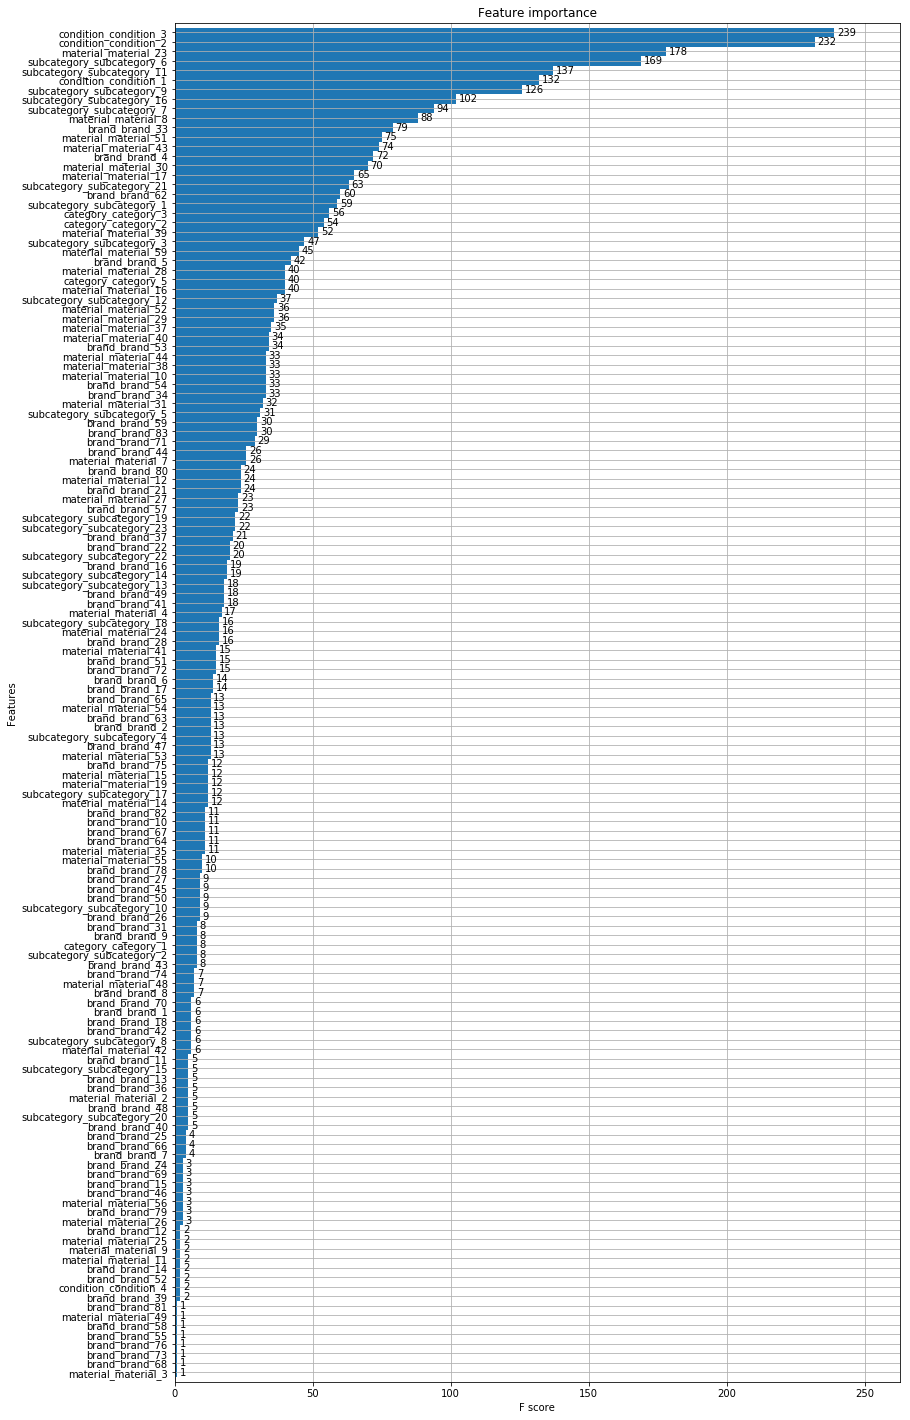

In [206]:
figsize=(13,25)
fig, ax = plt.subplots(1,1,figsize=figsize)
xgb.plot_importance(MODEL, ax=ax,height = 1)

### Validation croisée k-fold à l'aide de XGBoost

#### Hyperparamètres 

In [118]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
# métriques RMSE de train et de test pour chaque round de boost
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,110.085526,0.146143,110.098279,0.242432
1,104.301979,0.178810,104.289083,0.373218
2,98.988561,0.098716,98.986549,0.513989
3,94.298594,0.365976,94.290309,0.450670
4,90.343442,0.335177,90.354947,0.521686


In [120]:
print((cv_results["test-rmse-mean"]).tail(1))

599    53.207395
Name: test-rmse-mean, dtype: float64


## bayesian optimisation

In [124]:
!pip install bayesian-optimization

  Running setup.py bdist_wheel for bayesian-optimization: started
  Running setup.py bdist_wheel for bayesian-optimization: finished with status 'done'
  Stored in directory: C:\Users\PC\AppData\Local\pip\Cache\wheels\5a\56\ae\e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [131]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [134]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (0.8, 1.0),  
    'colsample': (1.0, 1.0),  
    'gamma': (0, 5)}
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGBRegressor(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train, Y_train, cv=3, scoring='rmse'))
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)
print (optimizer.best_params_)

AttributeError: 'BayesianOptimization' object has no attribute 'best_params_'

In [143]:
test = pd.read_csv('./test_set_data.csv/test_set_data.csv', sep =",")
test.head()

,id_product,month,day,universe,category,subcategory,brand,model,colour,material,condition,popularity_1,popularity_2
0,0,3.0,1.0,universe_2,category_1,subcategory_20,brand_51,NaN,colour_3,material_29,condition_2,8.0,16.0
1,1,9.0,18.0,universe_2,category_3,subcategory_14,brand_70,NaN,colour_6,material_7,condition_3,4.0,4.0
2,2,3.0,27.0,universe_2,category_3,subcategory_23,brand_45,NaN,colour_13,material_44,condition_3,0.0,2.0
3,3,7.0,28.0,universe_2,category_3,subcategory_21,brand_31,NaN,colour_2,material_7,condition_3,6.0,0.0
4,4,1.0,28.0,universe_2,category_1,subcategory_20,brand_63,NaN,colour_4,material_34,condition_3,10.0,2.0


In [144]:
test=test.drop(columns=["model"],axis=1)

In [145]:
test=test.drop(test[test.popularity_1>20].index & test[test.popularity_2>20].index)
print(test.head)

<bound method NDFrame.head of        id_product  month   day    universe    category     subcategory  \
0               0    3.0   1.0  universe_2  category_1  subcategory_20   
1               1    9.0  18.0  universe_2  category_3  subcategory_14   
2               2    3.0  27.0  universe_2  category_3  subcategory_23   
3               3    7.0  28.0  universe_2  category_3  subcategory_21   
4               4    1.0  28.0  universe_2  category_1  subcategory_20   
5               5    9.0  27.0  universe_2  category_3   subcategory_6   
6               6   10.0   6.0  universe_1  category_3  subcategory_12   
7               7    3.0  19.0  universe_2  category_3   subcategory_7   
8               8    6.0   5.0  universe_2  category_3  subcategory_21   
9               9   10.0  27.0  universe_2  category_3   subcategory_7   
10             10    6.0   5.0  universe_2  category_5  subcategory_10   
11             11    8.0   7.0  universe_2  category_2   subcategory_9   
12      

In [186]:
test.shape

(24584, 12)

In [184]:
data.material.describe()

count          149636
unique             60
top       material_23
freq            40704
Name: material, dtype: object

In [159]:
#on utilise 5 variables explicatives
#X = data.drop(columns='price') 
X =test[['condition','brand','subcategory','category','material']]

#conversion des variables catégorielles :
X = pd.get_dummies(X) 
X["id_product"]=test["id_product"]

In [160]:
X.shape

(24584, 161)

In [12]:
y_test_predict['id_product']=Y_test['id_product'].copy()

KeyError: 'id_product'

In [149]:
prediction = rf.predict(X)

ValueError: Number of features of the model must match the input. Model n_features is 175 and input n_features is 161 

In [154]:
X_t=X.copy()

In [153]:
data.shape

(149636, 13)

In [57]:
Y_Test = Y_test.insert(0,'id_product', int, allow_duplicates=False)

AttributeError: 'Series' object has no attribute 'insert'

In [58]:
Y_Test = Y_test.insert ( 0, 'id_product' , y_test_predict ) 

AttributeError: 'Series' object has no attribute 'insert'

In [60]:
from sklearn import ensemble

In [61]:
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,Y)
importances = model.feature_importances_

In [67]:
feature_names =X.columns.tolist()

In [69]:
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

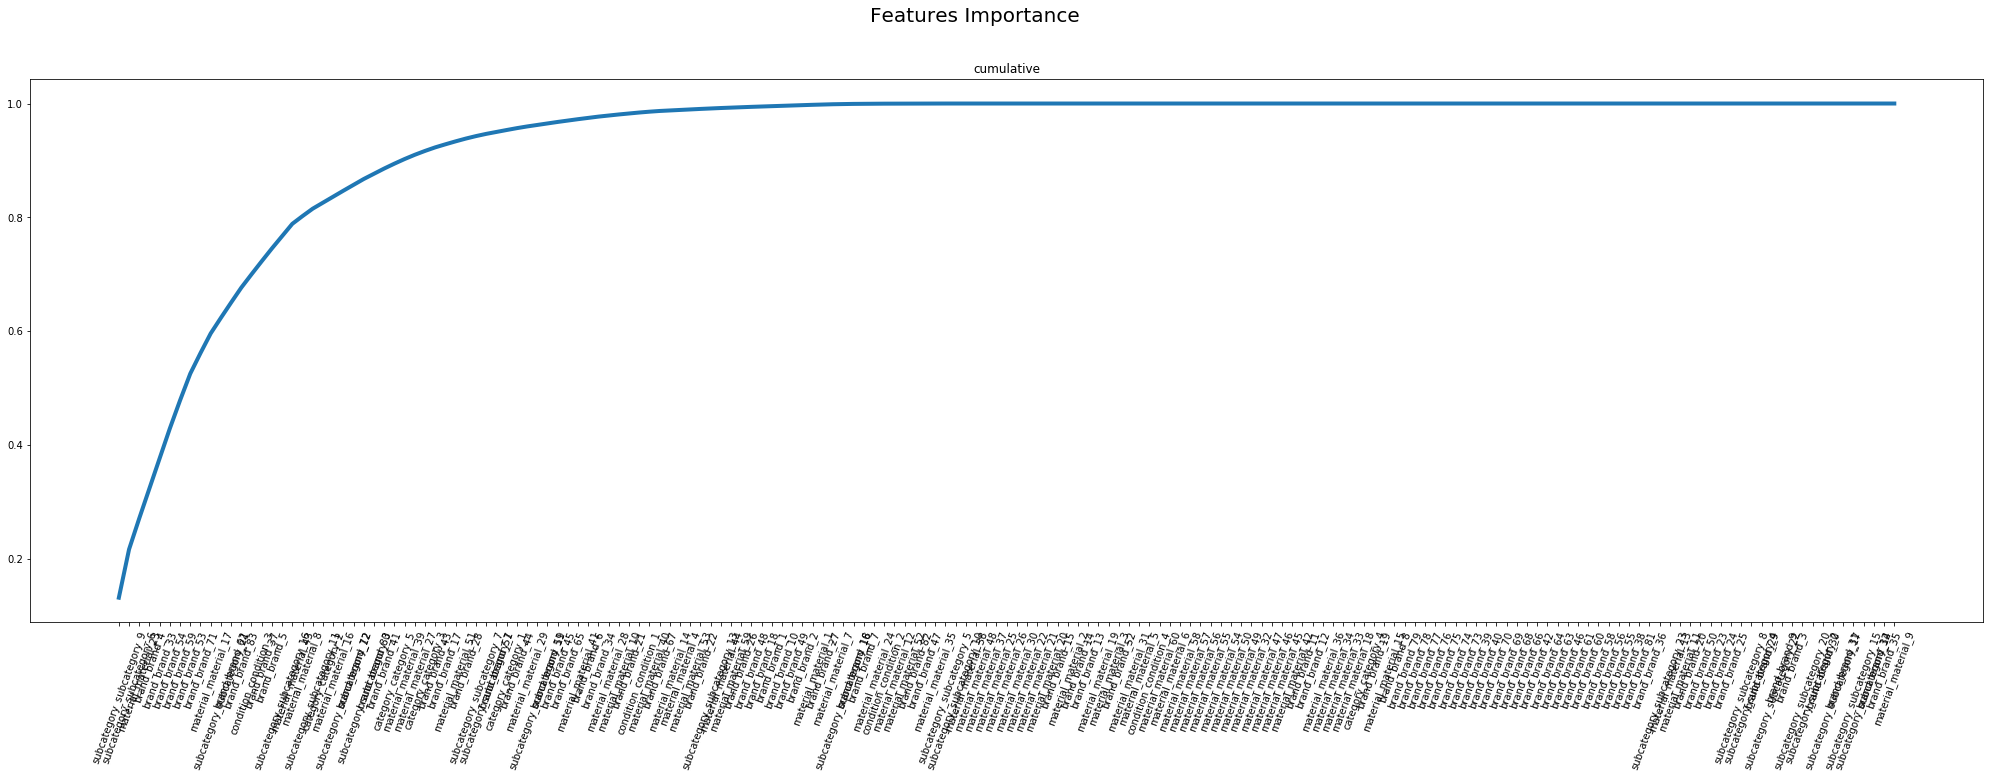

In [91]:
figsize=(35,10)
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False,figsize=figsize)
fig.suptitle("Features Importance", fontsize=20)

ax.title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax)
ax.set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
#plt.grid(axis='both')
plt.show()


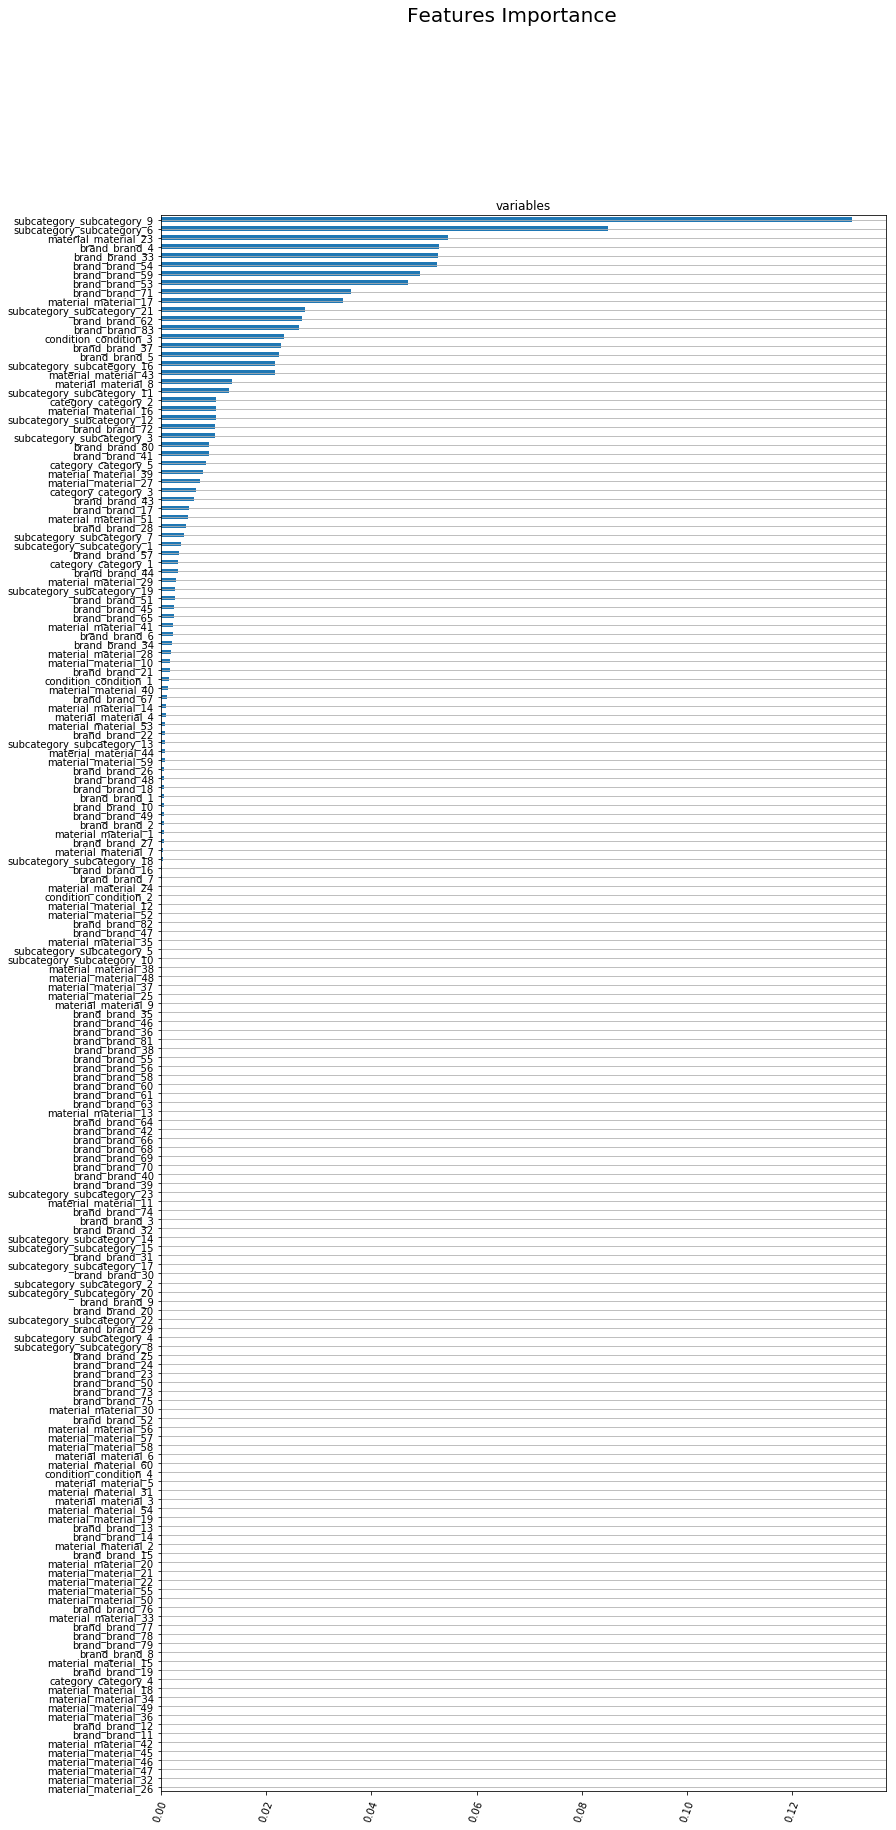

In [96]:
figsize=(13,29)
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False,figsize=figsize)
fig.suptitle("Features Importance", fontsize=20)
ax.title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax).grid(axis="x")
ax.set(ylabel="")

plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()
